In [ ]:
# Read file csv
import numpy as np 
import pandas as pd

data = pd.read_csv('heart_disease.csv')

In [ ]:
# Show data 5 teratas 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,M,3,145,233,True,0,150,no,2.3,0,0,1,1
1,37,M,2,130,250,False,1,187,no,3.5,0,0,2,1
2,41,F,1,130,204,False,0,172,no,1.4,2,0,2,1
3,56,M,1,120,236,False,1,178,no,0.8,2,0,2,1
4,57,F,0,120,354,False,1,163,yes,0.6,2,0,2,1


In [ ]:
# Keterangan info dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: bool(1), float64(1), int64(10), object(2)
memory usage: 31.2+ KB


In [ ]:
# Preprocessing data dengan LabelEncoder 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['sex'] = labelencoder.fit_transform(data['sex'])
data['fbs'] = labelencoder.fit_transform(data['fbs'])
data['exang'] = labelencoder.fit_transform(data['exang'])

In [ ]:
# Show data 5 teratas 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Keterangan info dari data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Apakah ada data yang null?
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Eksplorasi data
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

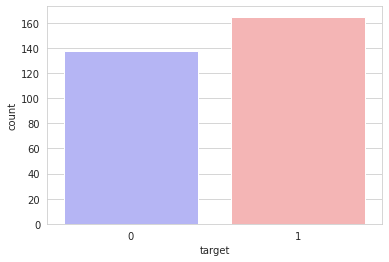

In [ ]:
# Visualisasi data jumlah target (1 = more chance or 0 = less chance)
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [ ]:
# Persentasi target (1 = more chance or 0 = less chance)
moreChance = len(data[data.target == 1])
lessChance = len(data[data.target == 0])

print("Persentase pasien menderita Heart Disease : {:.2f}%".format((moreChance/len(data.target))*100))
print("Persentase pasien tidak menderita Heart Disease : {:.2f}%".format((lessChance/len(data.target))*100))

Persentase pasien menderita Heart Disease : 54.46%
Persentase pasien tidak menderita Heart Disease : 45.54%


In [ ]:
# Grouping data pada colomn target dengan mean 
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
# Deskripsi dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# x data (attribute data) / data feature
x = data.drop(['target'], axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
# Preprocessing Min-Max Normalization
# Normalisasi untuk centering dan scaling data, dimana data mempunyai nilai max = 1 dan nilai min = 0 (Min-Max Normalization)
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x)).values
x_normalized.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# y data (class data) / data target
y = data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# Split data untuk training dan testing
from sklearn.model_selection import train_test_split

# Disini kami membagi data, 80% untuk training dan 20% untuk testing
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=0)

Akurasi_per_Algoritma = {}

##**DECISION TREE**

In [ ]:
# Algoritma Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree dengan criteria 'gini'
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit(x_train, y_train)

accScoreDTGini = dtree1.score(x_test, y_test) * 100

Akurasi_per_Algoritma['Decision Tree (Gini)'] = accScoreDTGini

print('Akurasi Test Decision Tree (Gini) {:.2f}%'.format(accScoreDTGini))

Akurasi Test Decision Tree (Gini) 77.05%


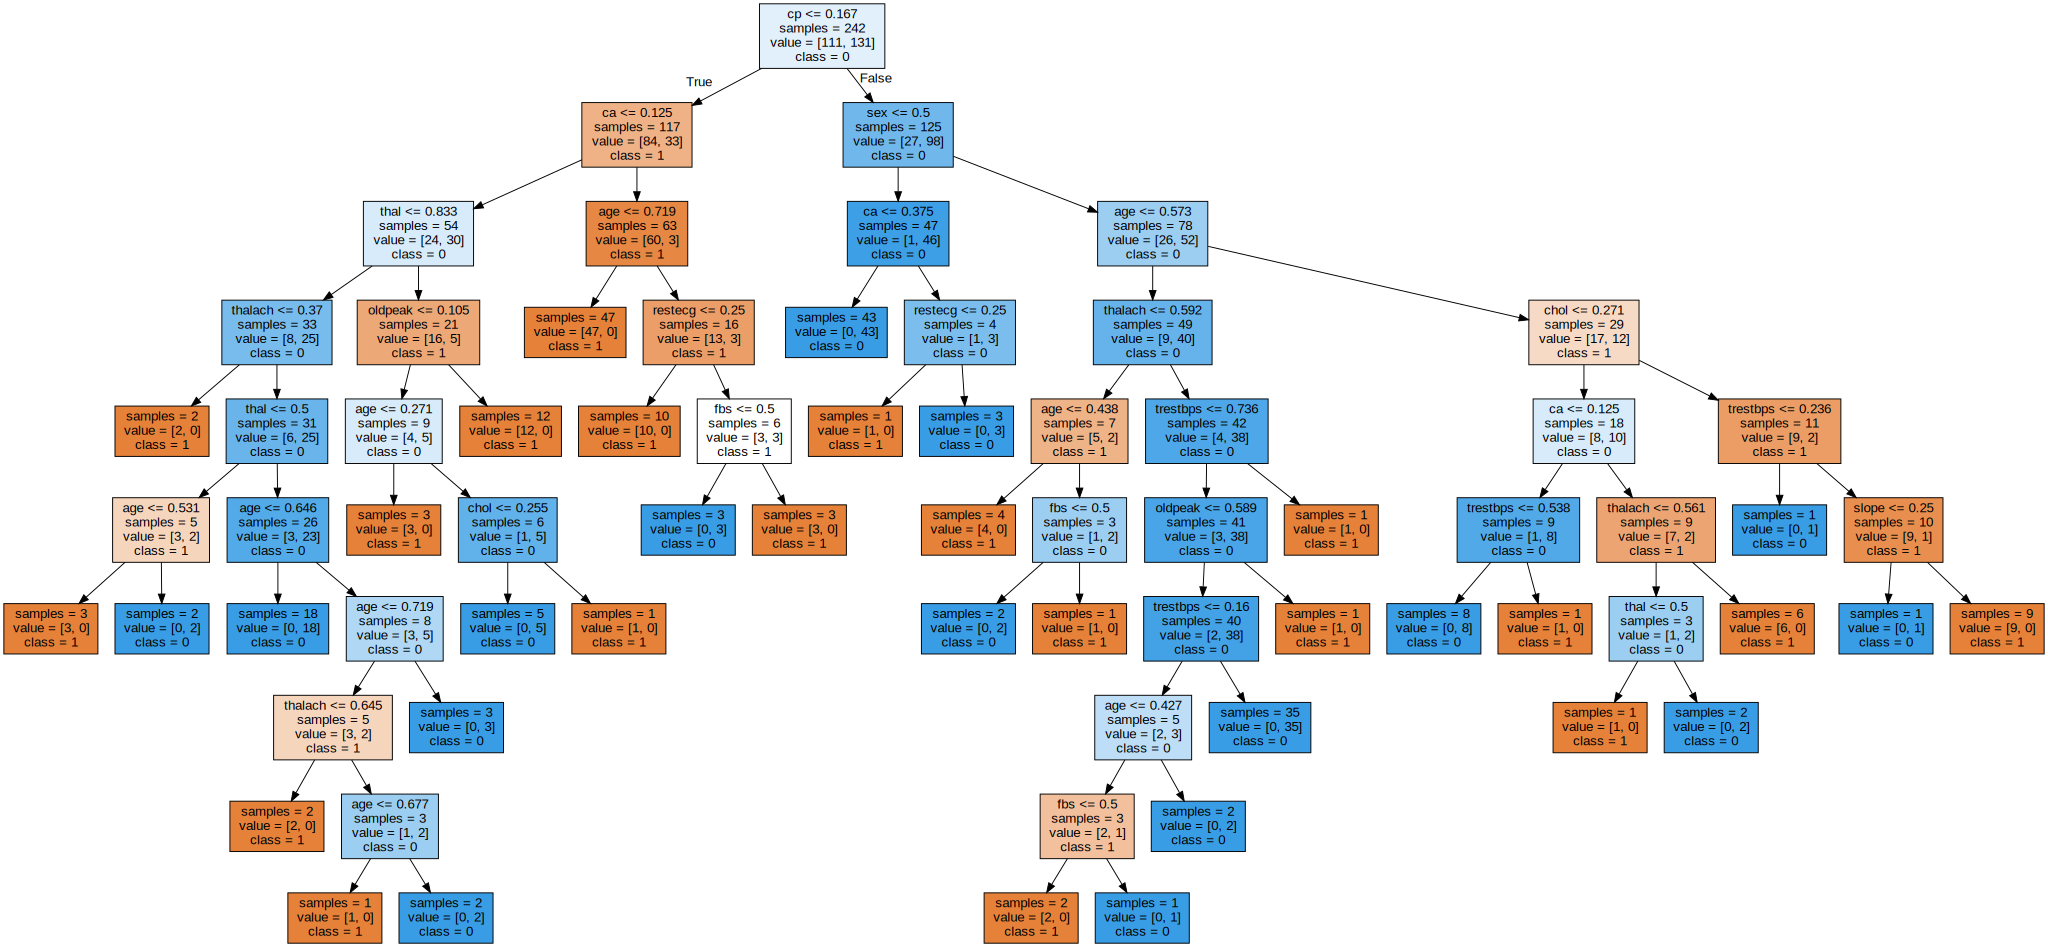

In [ ]:
# Visualisasi Decision Tree (Gini)
from sklearn.tree import export_graphviz

export_graphviz(dtree1, out_file="dtree1.dot", class_names=("1", "0"), 
                feature_names=x.columns, impurity=False, filled=True)

import graphviz

with open("dtree1.dot") as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)

In [ ]:
# Decision Tree dengan criteria 'entropy'
dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train, y_train)

accScoreDTEntropy = dtree2.score(x_test, y_test) * 100

Akurasi_per_Algoritma['Decision Tree (Entropy)'] = accScoreDTEntropy

print('Akurasi Test Decision Tree (Entropy) {:.2f}%'.format(accScoreDTEntropy))

Akurasi Test Decision Tree (Entropy) 78.69%


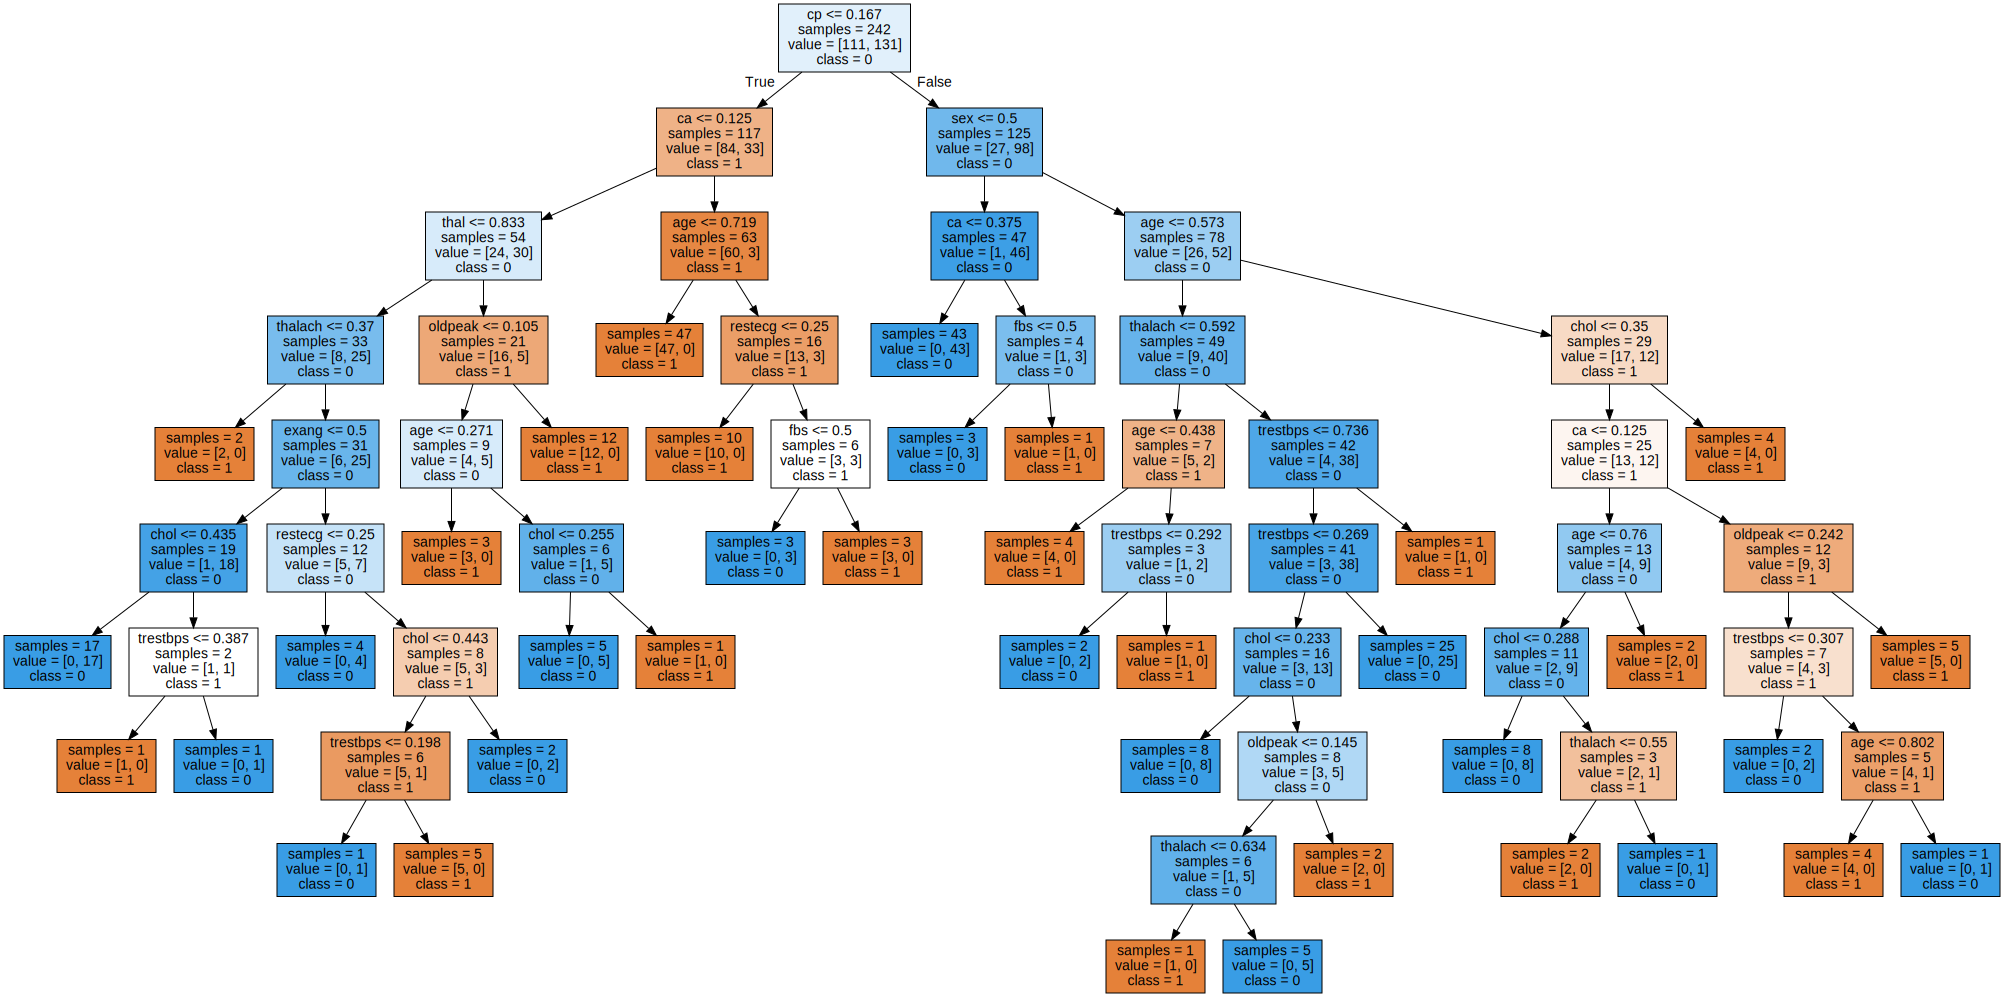

In [ ]:
# Visualisasi Decision Tree (Entropy)
from sklearn.tree import export_graphviz

export_graphviz(dtree2, out_file="dtree2.dot", class_names=("1", "0"), 
                feature_names=x.columns, impurity=False, filled=True)

import graphviz

with open("dtree2.dot") as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)

##**SUPPORT-VECTOR MACHINE**

In [ ]:
# Algoritma SVM
from sklearn.svm import SVC

In [ ]:
# SVM Kernel 'linear'
svmLinear = SVC(kernel = 'linear')
svmLinear.fit(x_train, y_train)

accScoreSVMLinear = svmLinear.score(x_test, y_test) * 100

Akurasi_per_Algoritma['SVM (linear)'] = accScoreSVMLinear

print('Akurasi Test SVM (linear) : {:.2f}%'.format(accScoreSVMLinear))

Akurasi Test SVM (linear) : 83.61%


In [ ]:
# SVM Kernel 'rbf'
svmRbf = SVC(kernel = 'rbf')
svmRbf.fit(x_train, y_train)

accScoreSVMRbf = svmRbf.score(x_test, y_test) * 100

Akurasi_per_Algoritma['SVM (rbf)'] = accScoreSVMRbf

print('Akurasi Test SVM (rbf) : {:.2f}%'.format(accScoreSVMRbf))

Akurasi Test SVM (rbf) : 83.61%


In [ ]:
# SVM Kernel 'sigmoid'
svmSigmoid = SVC(kernel = 'sigmoid')
svmSigmoid.fit(x_train, y_train)

accScoreSVMSigmoid = svmSigmoid.score(x_test, y_test) * 100

Akurasi_per_Algoritma['SVM (sigmoid)'] = accScoreSVMSigmoid

print('Akurasi Test SVM (sigmoid) : {:.2f}%'.format(accScoreSVMSigmoid))

Akurasi Test SVM (sigmoid) : 78.69%


##**K-NEAREST NEIGHBORS**

In [ ]:
# Algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Mencari nilai K terbaik
scoreList = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    scoreList.append(knn.score(x_test, y_test))

# nilai K terbaik terdapat saat K = 7
accScoreKNN = max(scoreList) * 100

Akurasi_per_Algoritma['KNN'] = accScoreKNN

print('Akurasi Test KNN : {:.2f}%'.format(accScoreKNN))

Akurasi Test KNN : 90.16%


##**LOGISTIC REGRESSION**

In [ ]:
# Algoritma Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegression = LogisticRegression()
logisticRegression.fit(x_train, y_train)

accScoreLogisticRegression = logisticRegression.score(x_test, y_test) * 100

Akurasi_per_Algoritma['Logistic Regression'] = accScoreLogisticRegression

print('Akurasi Test Logistic Regression : {:.2f}%'.format(accScoreLogisticRegression))

Akurasi Test Logistic Regression : 83.61%


##**PERBANDINGAN MODEL**

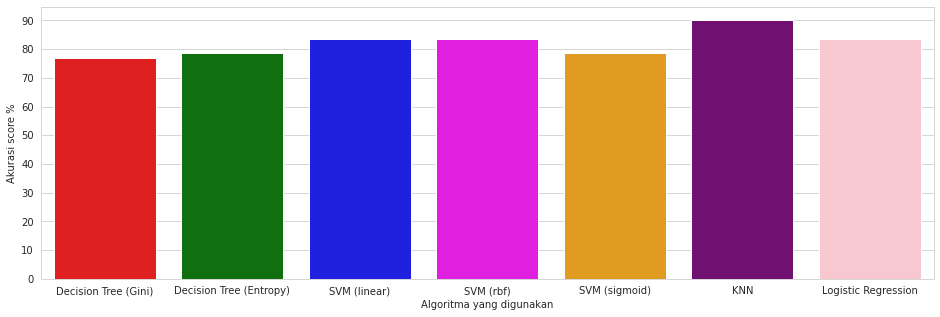

In [ ]:
col = ["red", "green", "blue", "magenta","orange", "purple", "pink"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Akurasi score %")
plt.xlabel("Algoritma yang digunakan")
sns.barplot(x=list(Akurasi_per_Algoritma.keys()), y=list(Akurasi_per_Algoritma.values()), palette=col)
plt.show()

##**CONFUSION MATRIX**

In [ ]:
# Predicted values
y_dtree1 = dtree1.predict(x_test)
y_dtree2 = dtree2.predict(x_test)
y_svmLinear = svmLinear.predict(x_test)
y_svmRbf = svmRbf.predict(x_test)
y_svmSigmoid = svmSigmoid.predict(x_test)
bestKNN = KNeighborsClassifier(n_neighbors = 7)
bestKNN.fit(x_train, y_train)
y_knn = bestKNN.predict(x_test)
y_logisticRegression = logisticRegression.predict(x_test)

In [ ]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix

cm_dtree1 = confusion_matrix(y_test, y_dtree1)
cm_dtree2 = confusion_matrix(y_test, y_dtree2)
cm_svmLinear = confusion_matrix(y_test, y_svmLinear)
cm_svmRbf = confusion_matrix(y_test, y_svmRbf)
cm_svmSigmoid = confusion_matrix(y_test, y_svmSigmoid)
cm_knn = confusion_matrix(y_test, y_knn)
cm_logisticRegression = confusion_matrix(y_test, y_logisticRegression)

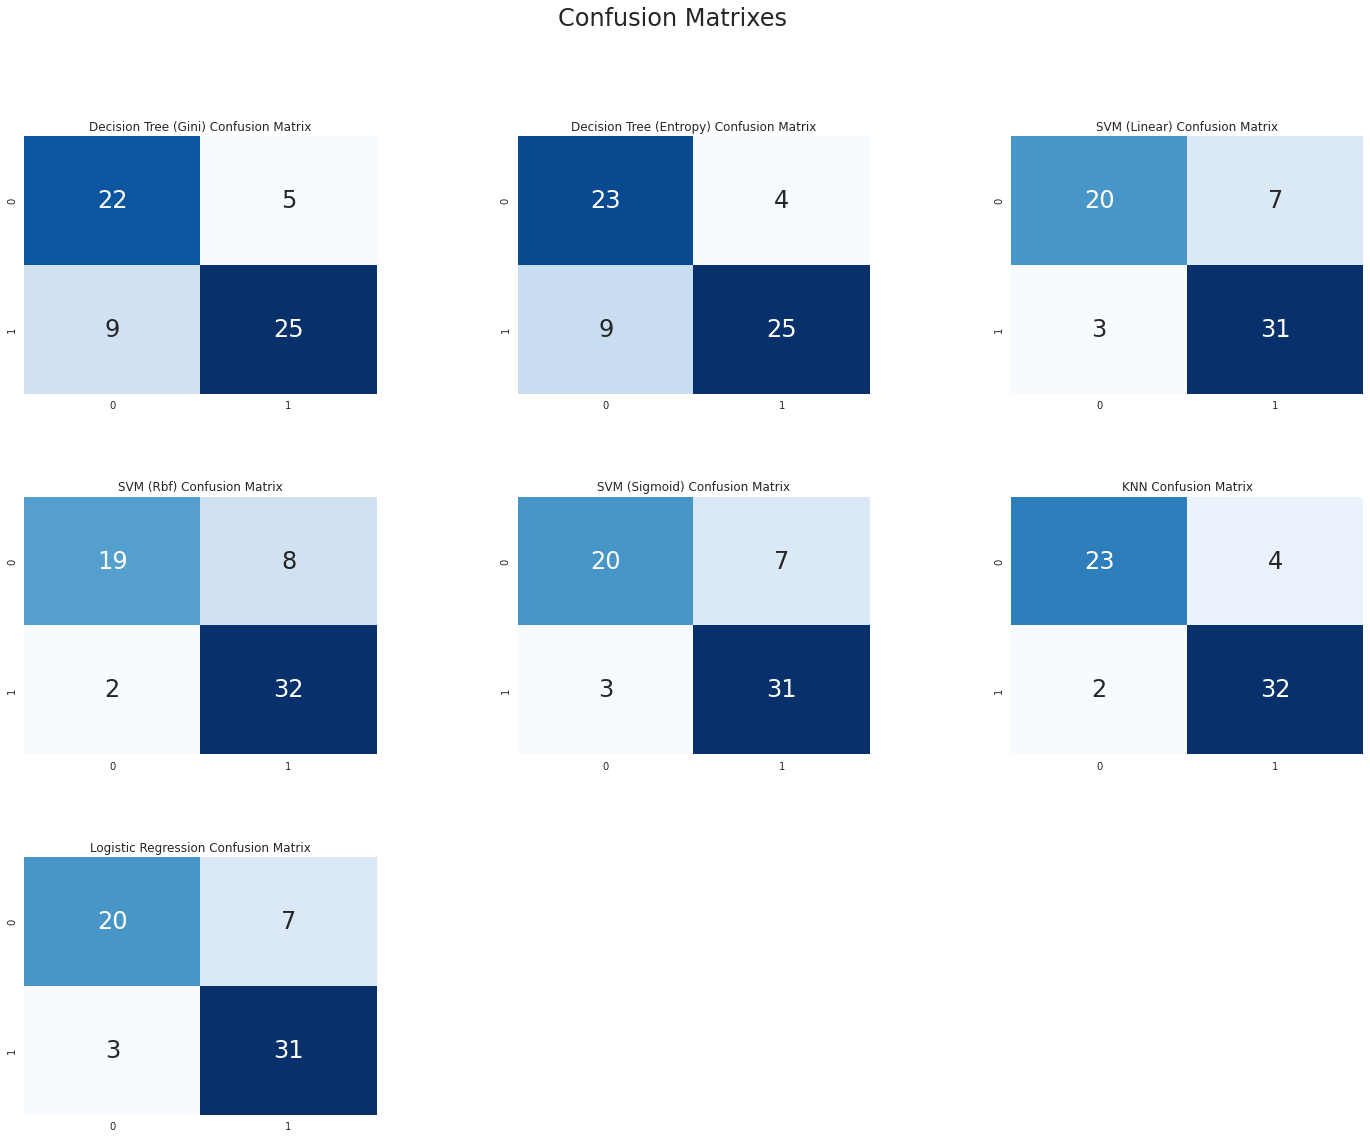

In [ ]:
# Visualisasi Confusion Matrix

plt.figure(figsize=(24,18))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Decision Tree (Gini) Confusion Matrix")
sns.heatmap(cm_dtree1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Decision Tree (Entropy) Confusion Matrix")
sns.heatmap(cm_dtree2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("SVM (Linear) Confusion Matrix")
sns.heatmap(cm_svmLinear,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("SVM (Rbf) Confusion Matrix")
sns.heatmap(cm_svmRbf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("SVM (Sigmoid) Confusion Matrix")
sns.heatmap(cm_svmLinear,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logisticRegression,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()